# Part I - Exploration of Ford GoBike System Data
## by Jinwoong Nam

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area during February 2019.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
df[df['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


In [6]:
df[df['member_birth_year'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


- 197 rows have mssing values for start and end station information (id, name) -> Remove 197 null rows

In [7]:
# copy the original dataframe
df_clean = df.copy()

# remove the null rows
df_clean = df_clean[df_clean['start_station_id'].notna()].reset_index(drop=True)
# same null rows for start_station_name, end_station_id, and end_station_name

- 8265 rows have missing values for member information (birth year, gender) -> Remove 8265 null rows

In [8]:
# remove the null rows
df_clean = df_clean[df_clean['member_birth_year'].notna()].reset_index(drop=True) # same null rows for member_gender

- The data type for start_time and end_time should be changed to datetime -> Change it to datetime using to_datetime method

In [9]:
# change the data type for start_time and end_time columns
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

- The data type for start_station_id, end_station_id, and bike_id should be changed to object -> Change it to object using astype method

In [10]:
# change the data type for start_station_id, end_station_id, and bike_id to object
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

- The data type for user_type, member_gender, and bike_share_for_all_trip can be changed to category -> Change it to category using astype method

In [11]:
# change the data type for member_birth_year
df_clean['user_type'] = df_clean['user_type'].astype("category")
df_clean['member_gender'] = df_clean['member_gender'].astype("category")
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype("category")

- The data type for member_birth_year should be changed to integer -> Change it to integer using astype method

In [12]:
# change the data type for member_birth_year
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [13]:
# check the results
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### What is the structure of your dataset?

After cleaning data, there are 174,952 bike-sharing usage data in the dataset with 16 different information. 'duration_sec', 'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', and 'member_birth_year' are quantitative variables, and 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_id', 'user_type', 'member_gender', and 'bike_share_for_all_trip' are categorical variables.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in predicting the patterns of bike-sharing usage and what/how the features in the dataset can be used for this.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think many members would use a bike for commuting between office buildings and subway/bus stations. If so, the start/end station in business areas may have high usage on morning/evening commute time. In addition, user type (customer or subscriber) and member age could affect bike usage where subscribers and young members are expected to have higher usage.

## Univariate Exploration

The distribution of duration will be shown first.

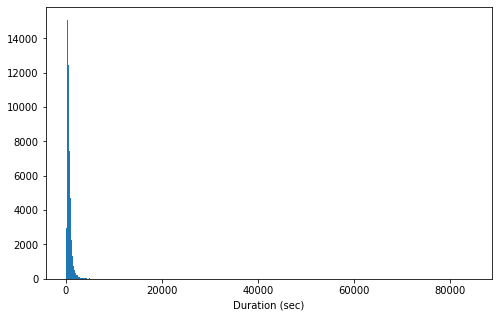

In [14]:
# standard-scaled plot
binsize = 60
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)

def standard_hist(figsize, data, col, bins, xlabel):
    plt.figure(figsize = figsize)
    plt.hist(data = data, x = col, bins = bins)
    plt.xlabel(xlabel)
    plt.show()

standard_hist([8,5], df_clean, 'duration_sec', bins, 'Duration (sec)')

In [15]:
# statistics for duration
df_clean['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

X-axis scales are too broad and the distributions are right-skewed. In this case, we can consider looking at it in log scale.

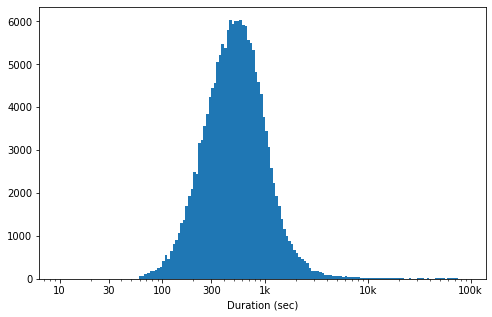

In [16]:
# log-scaled plot
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1000, 10000, 100000], [10, 30, 100, 300, '1k', '10k', '100k'])
plt.xlabel('Duration (sec)')
plt.show()

After taking the log, we can find that duration (sec) follows a normal-like distribution with a mean of ~700 sec. Most of the duration is between 150 and 2000 seconds which is between 2.5 and 33.3 minutes. This may imply our assumption mentioned above for the bike-sharing usage pattern could be reasonable since this duration range is fair for the time between subway/bus stations and the office buildings by bike.

Next, the distributions of start_time will be studied.

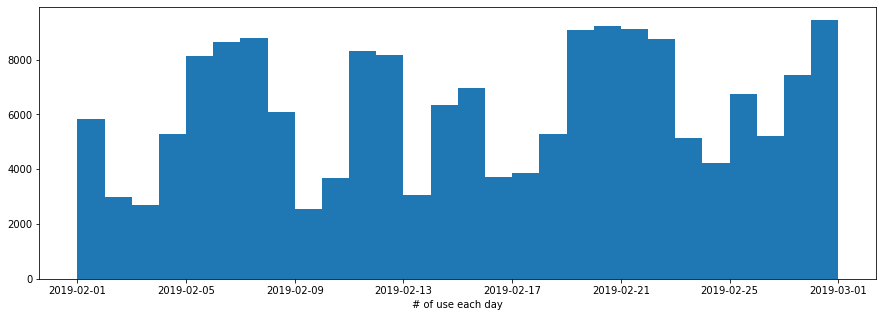

In [17]:
# start time: standard-scaled plot
bins = 28
standard_hist([15,5], df_clean, 'start_time', bins, '# of use each day')

By looking at the distributions of the start-time with a bin size of 28, we can approximately see the trends in bike-sharing usage each day. Generally, the usage is high on weekdays and low on weekends. For example, February 2, 3, 9, 10, 16, 17, 23, and 24 show relatively low counts as these dates are weekends. A 5-day high followed by a 2-day low pattern is observed with a few exceptions. Again, this trend is consistent with our early assumption that many customers use bike-sharing for their commute.

If we see when the most trips are taken in terms of time of day, we can make it more solid statement.

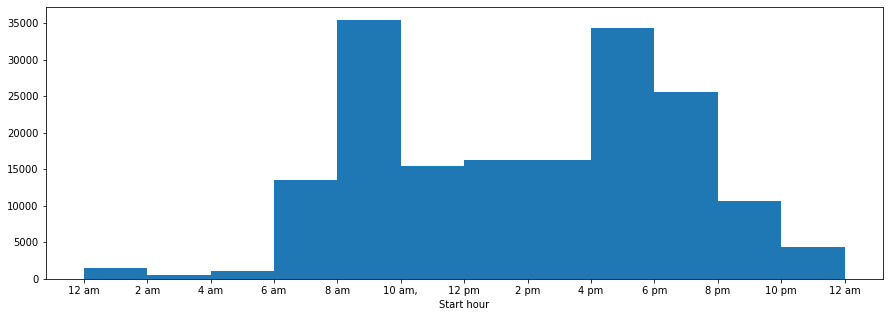

In [18]:
# start time (hour): standard-scaled plot
start_hour = pd.DatetimeIndex(df_clean['start_time']).hour.to_list()
binsize = 2
bins = np.arange(0,24+binsize,binsize)
xticks_hour = ['12 am', '2 am', '4 am', '6 am', '8 am', '10 am,', '12 pm', '2 pm', '4 pm', '6 pm', '8 pm', '10 pm', '12 am']

plt.figure(figsize = [15,5])
plt.hist(start_hour, bins = bins)
plt.xticks(bins, xticks_hour)
plt.xlabel('Start hour')
plt.show()

Two peaks are high in the distribution above. One between 8 and 10 am, the other one between 4 and 6 pm. Given the most of the trip takes less than 33.3 minutes, these disributions can support our assumption again. 

Now, we'll move on to some categorical variables in the dataset: start_station_name and end_station_name

In [19]:
# check the number of unique start/end station names
print('start station: ', df_clean['start_station_name'].nunique())
print('end station: ', df_clean['end_station_name'].nunique())

start station:  329
end station:  329


Since there are too many numbers of start/end stations, we will proceed with only the top 10 and bottom 10 start/end stations.

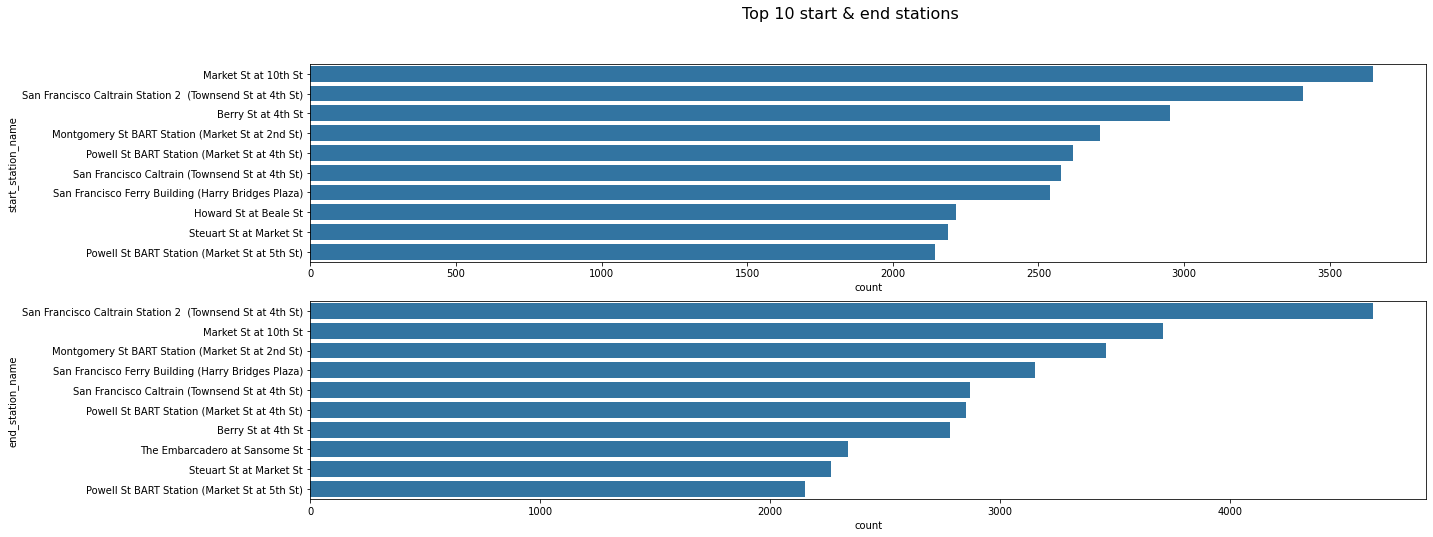

In [20]:
# both the top 10 start and end stations will be plotted together to get an idea of each nominal variable's distribution.
fig, ax = plt.subplots(nrows=2, figsize = [20,8])
fig.suptitle('Top 10 start & end stations', fontsize=16)
base_color = sb.color_palette()[0]

sb.countplot(data = df_clean, y='start_station_name', color = base_color, 
             order = df_clean['start_station_name'].value_counts()[:10].index, ax = ax[0])
sb.countplot(data = df_clean, y='end_station_name', color = base_color, 
             order = df_clean['end_station_name'].value_counts()[:10].index, ax = ax[1])

plt.show()

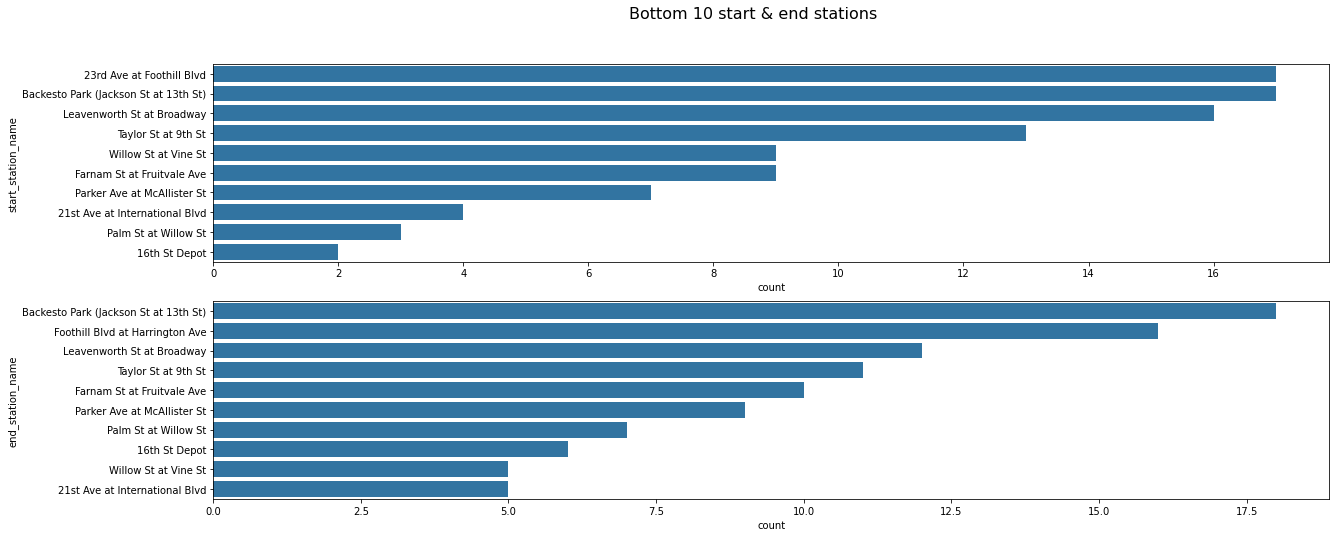

In [21]:
# both the bottom 10 start and end stations will be plotted together to get an idea of each nominal variable's distribution.
fig, ax = plt.subplots(nrows=2, figsize = [20,8])
fig.suptitle('Bottom 10 start & end stations', fontsize=16)

sb.countplot(data = df_clean, y ='start_station_name', color = base_color, 
             order = df_clean['start_station_name'].value_counts()[-10:].index, ax = ax[0])
sb.countplot(data = df_clean, y='end_station_name', color = base_color, 
             order = df_clean['end_station_name'].value_counts()[-10:].index, ax = ax[1])

plt.show()

Most of the top 10 start stations are the same as the top 10 end stations and the same applies to the bottom 10 start/end stations, which obviously makes sense. As expected, the top 10 stations are all located in the downtown area of San Francisco possibly due to a higher floating population. On the other hand, in the bottom 10 stations list, only 2 stations (Leavenworth St at Broadway, Parker Ave at McAllister St) are located in downtown San Francisco whereas 8 other stations are all in suburban areas.

Now, we will look at the other features in the data to see if any of them hold interesting properties: member age, member gender, user type (customer, subscriber), bike share for all trip

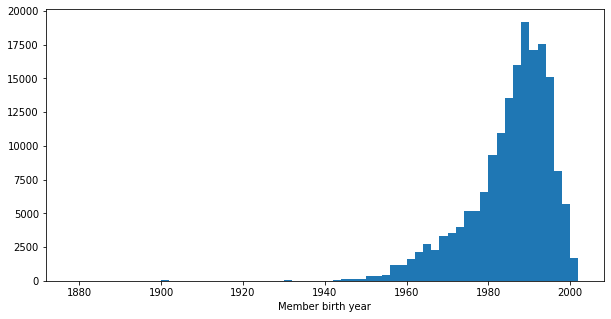

In [22]:
# member birth year: standard-scaled plot
binsize = 2
bins = np.arange(df_clean['member_birth_year'].min(), df_clean['member_birth_year'].max()+binsize,binsize)

standard_hist([10,5], df_clean, 'member_birth_year', bins, 'Member birth year')

Since we can see some outliers (e.g. 1878, 1900), we need to limit the scale of the x-axis so that we can see only valid member birth years data. Also, the x ticks label will be changed to their ages instead of their birth years for easier interpretability.

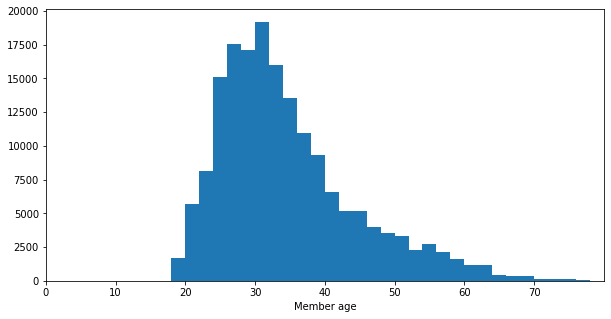

In [23]:
# member age histogram
binsize = 2
bins = np.arange(2019-df_clean['member_birth_year'].max(), 2019-1930+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist(2019 - df_clean['member_birth_year'], bins = bins)
plt.xlim(0, 80)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70])
plt.xlabel('Member age')
plt.show()

Not surprisingly, most of the users are in their 20s and 30s according to the histogram above. It is understandable that young people are more toward bike-hiking services than older people.

Next, we will look at the members' gender, user type, and whether or not bike share is for all trips.

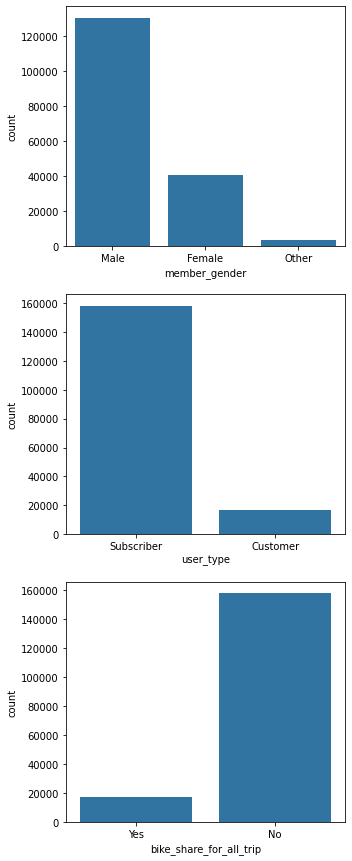

In [24]:
# bar plots for member gender, user type, and bike share for all trips
fig, ax = plt.subplots(nrows=3, figsize = [5,15])

sb.countplot(data=df_clean, x='member_gender', color=base_color, order=['Male', 'Female', 'Other'], ax=ax[0])
sb.countplot(data=df_clean, x='user_type', color=base_color, order=['Subscriber', 'Customer'], ax=ax[1])
sb.countplot(data=df_clean, x='bike_share_for_all_trip', color=base_color, order=['Yes', 'No'], ax=ax[2])
plt.show()

The number of male users in total usage is more than three times bigger than the number of females. For user type, the subscribed users are much more (about eight times) than non-subscribed users (that is, customers). Most of the users use bike-sharing services as a part of their trip, which is, again, consistent with our assumption for the patterns.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Since the duration has a large range of values plus right-skewed distributions, I looked at the data using a log transformation. After the transformation, the data looked like a normal distribution with a mean of ~ 700 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating start time, I made a bin size 28 so that we can look at the usage each day of the month. Then, I extracted hour information only from the start time in order to see the trends in usage in terms of the time of the day. For start/end stations, I only looked at the top/bottom 10 stations because otherwise there are too many stations (329) to investigate. For member age, there are some outliers in member birth year (e.g. 1900) so I had to cut the range of the x-axis and I also changed the ticks to age from birth year for easy interpretability.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between numeric features in the data.

In [25]:
# additional numerical variables
df_clean['start_day'] = pd.DatetimeIndex(df_clean['end_time']).day
df_clean['end_day'] = pd.DatetimeIndex(df_clean['end_time']).day
df_clean['start_hour'] = start_hour
df_clean['end_hour'] = pd.DatetimeIndex(df_clean['end_time']).hour
df_clean['log_duration_sec'] = np.log10(df_clean['duration_sec'])

numeric_vars = ['log_duration_sec', 'start_day', 'end_day', 'start_hour', 'end_hour', 'member_birth_year']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

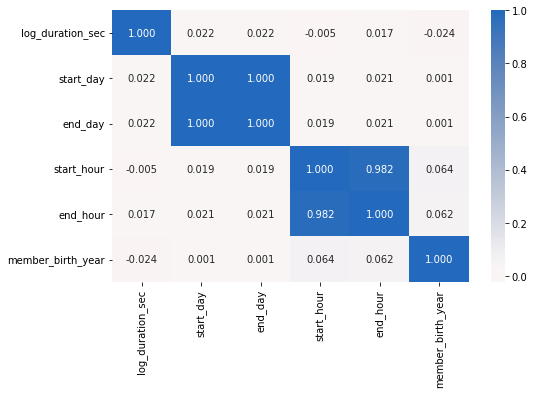

In [26]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

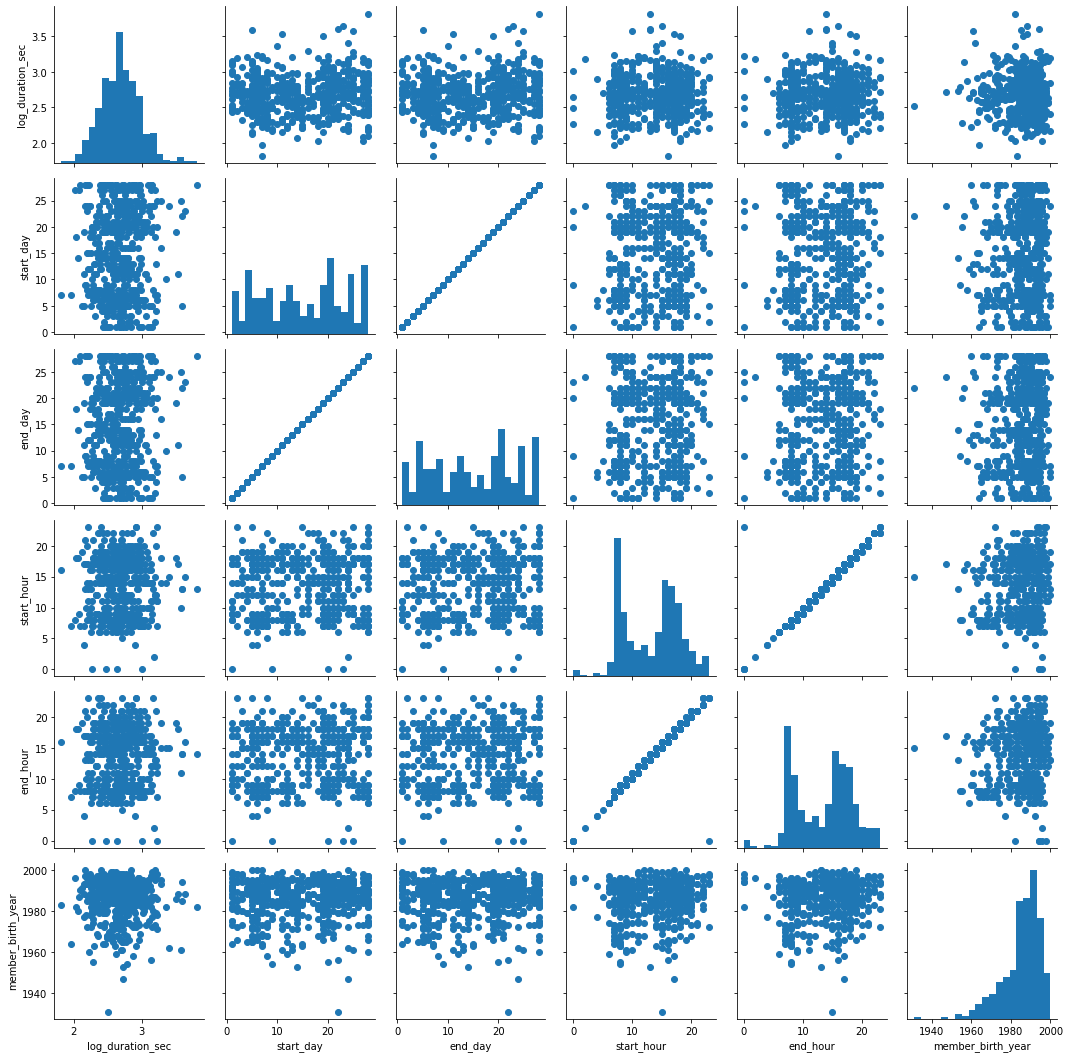

In [27]:
# plot matrix: sample 500 bike data so that plots are clearer and they render faster
bike_sample = df_clean.sample(n=500, replace = False)

g = sb.PairGrid(data = bike_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

As expected "start_day & end_day" and "start_hour & end_hour" are highly corrleated but no other corrleations are strong.  
Now, we move on to look at how duration and start hour (numeric variables) are correlated with the categorical variables.

<Figure size 720x720 with 0 Axes>

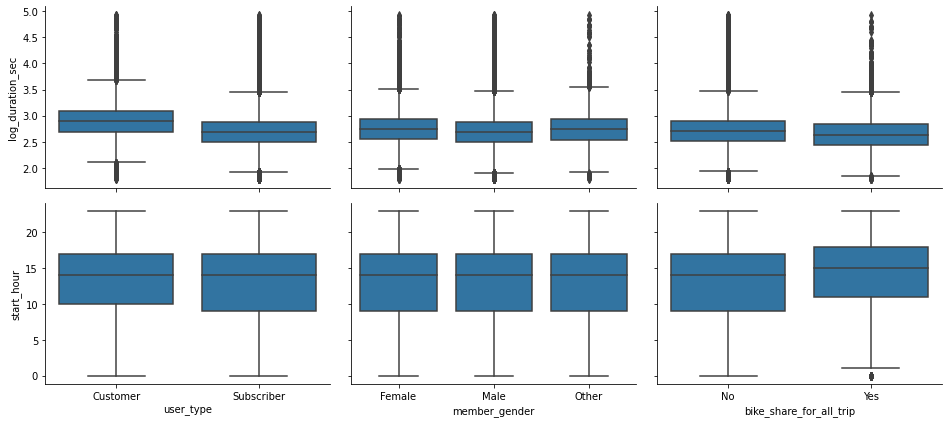

In [28]:
# plot matrix of numeric features against categorical features using box plots
def boxgrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=base_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_clean, y_vars = ['log_duration_sec', 'start_hour'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show()

Given the boxplots above,  
1) For user type, customers or non-subscribers have a longer duration than subscribers. Along with the previously shown histogram on user type in the univariate exploration, this result shows while subscribers account for higher portions in usage, they tend to spend a shorter time per trip than the non-subscribers.  
2) For member gender, Female has a distribution of a little longer duration than male (or comparable). No significant difference is found in start_hour.  
3) For bike_share_for_all_trip, I expected a longer duration for "yes" but "yes" and "no" are almost comparable, or "no" has a slightly longer duration. The distribution of start_hour for the "yes" group is upshifted compared to the "no" group. It would be interesting to see this difference in detail in the following visualizations.

Looking at the violin plots for the same variables can help find other aspects that can be missed using boxplots.

<Figure size 720x720 with 0 Axes>

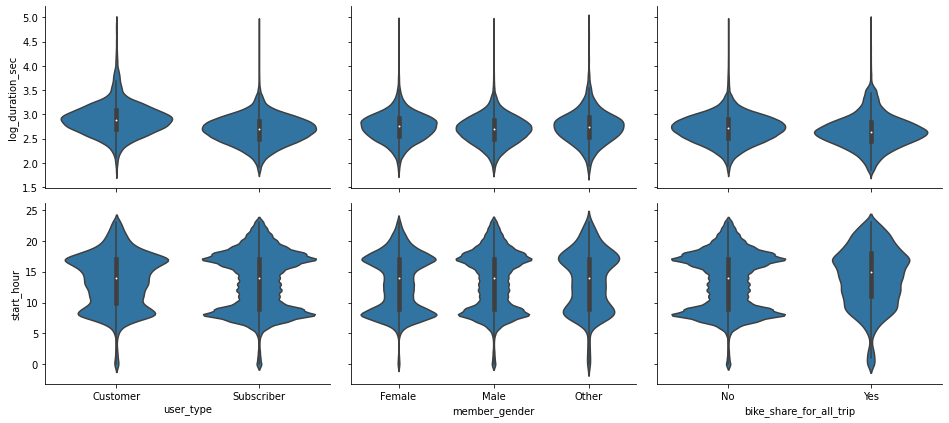

In [29]:
# plot matrix of numeric features against categorical features using violin plots
def violingrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.violinplot(x=x, y=y, color=base_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_clean, y_vars = ['log_duration_sec', 'start_hour'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(violingrid)
plt.show()

These violin plots confirm that usage is high in the morning and evening time regardless of their user type and gender. However, the "yes" group for bike_share_for_all_trip has very low usage in the morning time and relatively high usage in the evening and night. This led to the upshift of the box plot above.

Finally, let's look at relationships between the three categorical features.

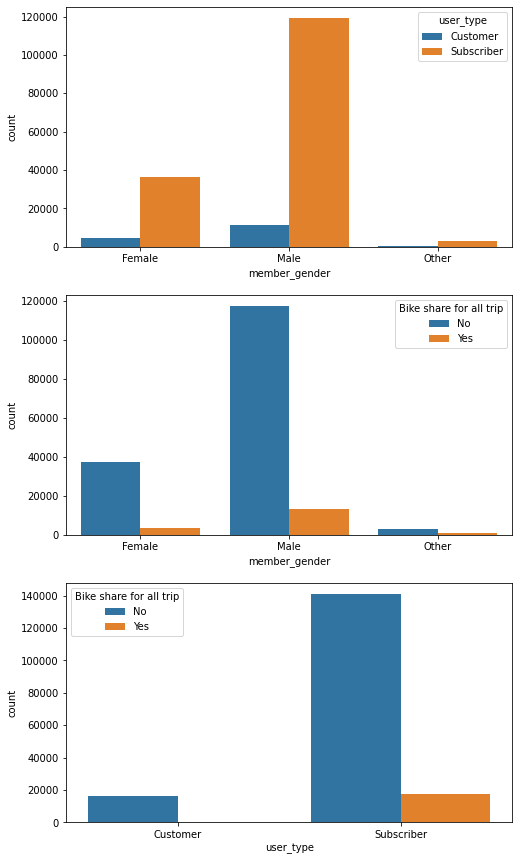

In [30]:
# clustered bar chart
plt.figure(figsize = [8, 15])

# subplot 1: gender vs. user type
plt.subplot(3, 1, 1)
sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type')

# subplot 2: gender vs. bike share for all trip
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_clean, x = 'member_gender', hue = 'bike_share_for_all_trip')
ax.legend(title='Bike share for all trip', loc=1)

# subplot 3: user type vs. bike share for all trip
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_clean, x = 'user_type', hue = 'bike_share_for_all_trip')
ax.legend(title='Bike share for all trip', loc=2)

plt.show()

While most of the users are subscribers, the male group has a bit higher ratio of subscribers/customers than the female group does. Most of the users take advantage of bike-sharing services as part of the trip (not the whole trip) regardless of their gender. Interestingly, none of the users in the non-subscriber group use the bike-sharing services for bike-only trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Customers or non-subscribers have a longer duration than subscribers implying subscribers tend to spend a shorter time per trip than the non-subscribers. Also, Female has a distribution of a little longer duration than male. The distribution of start_hour for the "bike share for all trip = yes" group is upshifted compared to the "no" group and this is attributed to very low usage in the morning and relatively high usage in the evening and night of this group. We can guess not many users exploit bike-sharing services for their whole trip in the morning.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The male group has a bit higher ratio of subscribers/customers than the female group does. Also, none of the users in the non-subscriber group use the bike-sharing services for bike-only trips.

## Multivariate Exploration

First, we will look at how gender plays into the relationship in the correlation between duration and start hour.

In [31]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0,24+2,2) # bins for start hour
    bins_y = np.arange(df_clean['log_duration_sec'].min(), df_clean['log_duration_sec'].max()+0.025, 0.025) # bins for log_duration
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks([0, 6, 12, 18, 24], ['12 am', '6 am', '12 pm', '6 pm', '12 am'])
    plt.yticks(np.log10([50, 100, 500, 3000, 10000, 30000]), [50, 100, 500, 3000, 10000, 30000])
    plt.ylim([np.log10(100), np.log10(10000)])

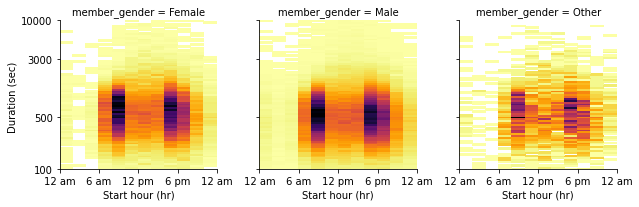

In [32]:
# create faceted heat maps on gender
g = sb.FacetGrid(data=df_clean, col='member_gender')
g.map(hist2dgrid, 'start_hour', 'log_duration_sec', color = 'inferno_r')
g.set_xlabels('Start hour (hr)')
g.set_ylabels('Duration (sec) ')

plt.show()

Given the faceted heat maps above, there is no significant difference in duration between males and females both in the morning and evening.  
Then, the faceted heat maps (start hour vs. duration) on user type will be shown.

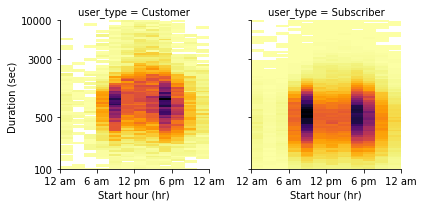

In [33]:
# create faceted heat maps on user type
g = sb.FacetGrid(data=df_clean, col='user_type')
g.map(hist2dgrid, 'start_hour', 'log_duration_sec', color = 'inferno_r')
g.set_xlabels('Start hour (hr)')
g.set_ylabels('Duration (sec) ')

plt.show()

As we found in the bivariate exploration, customers (non-subscribers) tend to spend more time per trip than subscribers. In this heat map, this pattern is observed at nearly any start hour.  
Finally, we will look at the faceted heat maps (start hour vs. duration) on "bike sharing for all trips".

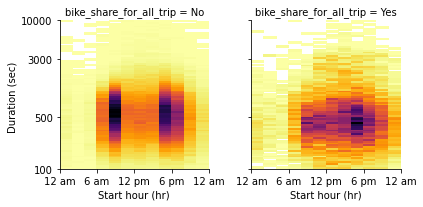

In [34]:
# create faceted heat maps on 'bike_share_for_all_trip'
g = sb.FacetGrid(data=df_clean, col='bike_share_for_all_trip')
g.map(hist2dgrid, 'start_hour', 'log_duration_sec', color = 'inferno_r')
g.set_xlabels('Start hour (hr)')
g.set_ylabels('Duration (sec) ')

plt.show()

The low usage in the morning for the "yes" group is observed again in this heat map. Also, in the "yes" group, the distribution of the duration is relatively widespread at any start hour while the "no" group has very much concentrated on the 300 - 1000 sec.

D:\anaconda3\envs\DAND\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


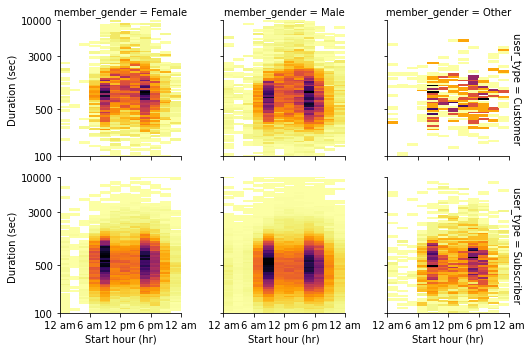

In [35]:
# create faceted heat maps on gender and user type together
g = sb.FacetGrid(data = df_clean, col = 'member_gender', row = 'user_type', size = 2.5, margin_titles = True)
g.map(hist2dgrid, 'start_hour', 'log_duration_sec', color = 'inferno_r')
g.set_xlabels('Start hour (hr)')
g.set_ylabels('Duration (sec) ')

plt.show()

By looking at the heat maps on gender and user type together, we are able to understand the interaction between the two features. However, no significant interaction is observed between gender and user type.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Customers (non-subscribers) tend to spend more time per trip than subscribers at any start hour. Also, the "bike share for all trip = yes" group has the distribution of the duration that is relatively widespread at any start hour while the "no" group has very much concentrated on the 300 - 1000 sec.

### Were there any interesting or surprising interactions between features?

There were no interesting interactions between gender and user type on duration trends implying they are almost independent features.

## Conclusions

I have investigated the patterns of bike-sharing services usage in the greater San Francisco Bay area during February 2019 with various visualizations.
In this study, I found that most of the usage occurred in the morning (7-10 am) and the evening (5-8 pm) for 2.5 and 33.3 minutes per single trip. Also, the usage on weekdays was higher than on weekends. These findings imply many users exploit the services for their commuting. In addition, the number of subscribers usage was much higher than the non-subscriber group while non-subscribers spent a longer time per trip than subscribers did. The users who travel only with bike-sharing services have less usage in the morning. Given these facts, we may argue that many users subscribe to the services, travel for a relatively short time with a bike compared to non-subscribers, and commute by the combination of bike and subway/train/bus or others.
These findings give many insights into developing strategies to help encourage more people to use the services.
